# Análisis Estratégico del Mercado Global de Videojuegos: Planificación de Campaña Comercial 2017

Este análisis se sitúa en diciembre de 2016. Como analista de datos para la e-commerce **ICE**, dedicada a la venta de videojuegos con alcance global, mi objetivo es proporcionar a la directiva los insights necesarios para optimizar el presupuesto publicitario del ciclo 2017. Para ello, identificaré los factores críticos que determinan el éxito comercial de un título.

Utilizaré datos históricos de ventas, géneros, plataformas y calificaciones para detectar patrones y plataformas emergentes. Este análisis actúa como una brújula estratégica para las inversiones de marketing del próximo año.

---

## Diccionario de Datos

Para garantizar la integridad del análisis, el dataset se compone de las siguientes variables clave:

* **Identificadores:** Nombre del juego (`name`), plataforma (`platform`) y año de lanzamiento (`year_of_release`).
* **Categorización:** Género del título (`genre`) y su clasificación de edad según la ESRB (`rating`).
* **Métricas de Venta:** Desglose de ingresos en millones de USD para Norteamérica (`na_sales`), Europa (`eu_sales`), Japón (`jp_sales`) y otros mercados (`other_sales`).
* **Métricas de Calidad:** Puntuación de la crítica profesional (`critic_score`) sobre 100 y puntuación de los usuarios (`user_score`) sobre 10.

## Metodología de Trabajo

Seguiré una metodología estructurada en cuatro fases críticas:

1. **Preparación y Preprocesamiento:** Preparación del entorno, limpieza de datos, tratamiento de valores nulos (especialmente casos 'TBD') y estandarización de tipos.
2. **Análisis Exploratorio (EDA):** Identificación de ciclos de vida de consolas y determinación del periodo relevante para el pronóstico.
3. **Perfilamiento Regional:** Análisis de hábitos de consumo por mercado (NA, EU, JP) para segmentación publicitaria.
4. **Validación Estadística:** Prueba de hipótesis sobre el comportamiento de los usuarios para validar suposiciones de mercado.

---

### 1. Preparación del Entorno y Preprocesamiento

En esta fase inicial, configuraré el entorno de trabajo con las librerías necesarias y realizaré la carga del dataset. El objetivo es realizar una inspección técnica profunda para identificar inconsistencias, valores nulos y tipos de datos mal asignados que podrían comprometer la integridad de nuestro análisis estratégico.

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# Configuración visual y pandas
sns.set_theme(style="whitegrid", palette="muted")
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
# Cargamos el conjunto de datos
try:
    games_df = pd.read_csv(r"../Data/ecommerce_ice.csv")
    print('Datos cargados con éxito.')
except FileNotFoundError as f:
    print(f'Error al cargar los datos: {f}')

Datos cargados con éxito.


In [3]:
# Inspección inicial
def check(name: str, df: pd.DataFrame) -> None:
    """Imprime diagnóstico de dimensiones, tipos, nulos, muestra y duplicados del DataFrame."""
    print(f"DIAGNÓSTICO: {name.upper()}")
    print(f"Dimensiones: {df.shape[1]} columnas x {df.shape[0]:,} filas")
    print("\nTipos de datos y nulos:")
    df.info(show_counts=True, memory_usage="deep")
    print("\nMuestra de los datos:")
    display(df.sample(n=min(len(df), 5), random_state=42))
    print(f"Valores nulos por columna:\n{df.isna().sum()}")
    print(f"\nValores únicos por columna:\n{df.nunique()}")
    print(f"\nDuplicados explícitos: {df.duplicated().sum()}")

check("games", games_df)

DIAGNÓSTICO: GAMES
Dimensiones: 11 columnas x 16,715 filas

Tipos de datos y nulos:
<class 'pandas.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  str    
 1   Platform         16715 non-null  str    
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  str    
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  str    
 10  Rating           9949 non-null   str    
dtypes: float64(6), str(5)
memory usage: 5.0 MB

Muestra de los datos:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,62.0,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008.0,Role-Playing,0.05,0.00,0.00,0.00,67.0,6.8,E


Valores nulos por columna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Valores únicos por columna:
Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

Duplicados explícitos: 0


In [4]:
print(games_df['User_Score'].unique())

<StringArray>
[  '8',   nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
   '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9', '6.4',
 '7.8', '7.5', '2.6', '7.2', '9.2',   '7', '7.3', '4.3', '7.6', '5.7',   '5',
 '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7', '5.4',   '4',
 '4.9', '4.5', '9.3', '6.2', '4.2',   '6', '3.7', '4.1', '5.8', '5.6', '5.5',
 '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5',
 '2.5', '1.9',   '3', '2.7', '2.2',   '2', '9.5', '2.1', '3.6', '2.8', '1.8',
 '3.8',   '0', '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
 '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9',   '1', '9.7']
Length: 97, dtype: str


**Hallazgos de la Inspección Inicial**

Tras ejecutar el diagnóstico del dataset `games_df`, he identificado los siguientes puntos críticos que requieren una intervención inmediata en la etapa de preprocesamiento:
* **Estandarización de Nomenclatura:** Los nombres de las columnas utilizan una mezcla de mayúsculas y minúsculas (CamelCase). Para asegurar la consistencia en el código y facilitar el acceso a los atributos, se deben transformar a snake_case (minúsculas).
* **Corrección de Tipos de Datos:** `year_of_release` se encuentra como float64 debido a valores nulos. Una vez tratados, deben convertirse a un tipo entero para un manejo cronológico correcto.
* **user_score:** Se detectó el valor 'tbd' (to be determined), lo que fuerza a la columna a ser de tipo str. Este valor representa la ausencia de calificación suficiente, por lo que debe ser tratado como un valor nulo (NaN) para permitir cálculos estadísticos.

**Tratamiento de Valores Ausentes**

* **Filas críticas:** Las columnas `name`, `genre` y `year_of_release` presentan una cantidad mínima de nulos (aprox. 1.6%). Dado que son datos fundamentales para la identificación de los títulos, optaré por eliminarlas para no introducir ruido en el análisis.
* **Calificaciones y Ratings:** Las columnas `critic_score`, `user_score` y `rating` tienen nulos significativos. Estos no se pueden imputar de manera aleatoria, por lo que se mantendrán o se marcarán con una etiqueta de "Desconocido" (especialmente en rating) para no sesgar las pruebas de hipótesis posteriores.

**Enriquecimiento de Información**

Carecemos de una métrica de Ventas Totales. Es necesario calcular la suma de las ventas regionales (na, eu, jp, other) para identificar el éxito global de cada título.

#### 1.1. Preprocesamiento y Limpieza Técnica

Una vez identificadas las inconsistencias, procederé a ejecutar un pipeline de limpieza técnica. Mi objetivo es estandarizar la estructura del dataset, corregir los tipos de datos para asegurar la precisión estadística y enriquecer los registros con métricas globales. Este proceso garantiza que las fases posteriores de análisis exploratorio se basen en datos íntegros y consistentes.

In [5]:
# Pipeline de integridad: nombres, nulos críticos, tipos y enriquecimiento
critic_cols = ['name', 'year_of_release', 'genre']
sales_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

games_df.columns = games_df.columns.str.lower().str.strip()
n_inicial = len(games_df)
games_df = games_df.dropna(subset = critic_cols).copy()
n_eliminados = n_inicial - len(games_df)

# user_score: to_numeric con errors='coerce' convierte 'tbd' y no numéricos en NaN
# year_of_release: entero (ya sin nulos tras dropna)
# total_sales: suma regional para métrica global
games_df = games_df.assign(
    user_score = pd.to_numeric(games_df['user_score'], errors='coerce'),
    year_of_release = games_df['year_of_release'].astype(int),
    total_sales = games_df[sales_cols].sum(axis = 1),
)

pct = (n_eliminados / n_inicial * 100) if n_inicial else 0
print("Limpieza completada:")
print(f"  - Registros eliminados por nulos en {critic_cols}: {n_eliminados} ({pct:.2f}%)")
print(f"  - Columnas: {list(games_df.columns)}")
print(f"  - Años: {games_df['year_of_release'].min()} a {games_df['year_of_release'].max()}")
print("\nEstado final de tipos y nulos:")
games_df.info()

Limpieza completada:
  - Registros eliminados por nulos en ['name', 'year_of_release', 'genre']: 271 (1.62%)
  - Columnas: ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating', 'total_sales']
  - Años: 1980 a 2016

Estado final de tipos y nulos:
<class 'pandas.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  str    
 1   platform         16444 non-null  str    
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  str    
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9

##### 1.1.1. **Conclusión del Preprocesamiento y Enriquecimiento**

El preprocesamiento ha transformado el dataset original en una base de datos estructurada y lista para el análisis estadístico, conservando el 98.38% de la muestra original. Los hitos alcanzados en esta fase son:

* **Integridad de la Muestra:** Tras eliminar los registros con nulos en columnas críticas (name, year_of_release, genre), conservamos el 98.38% de los datos originales. Esta pérdida es estadísticamente insignificante y garantiza que no trabajaremos con registros incompletos que sesguen el análisis temporal.
* **Estandarización Técnica:** Se implementó una nomenclatura snake_case y se corrigieron los tipos de datos, destacando el manejo de la métrica user_score. Al forzar los valores 'tbd' a NaN, habilitamos la columna para operaciones matemáticas sin perder la distinción entre un "0" y una "ausencia de datos".
* **Enriquecimiento:** La creación de `total_sales` nos permite evaluar el éxito global de cada título, factor esencial para la priorización de campañas.

**Nota sobre los Valores Ausentes en Calificaciones:** La persistencia de nulos en critic_score, user_score y rating no se atribuye a un error de limpieza, sino a la naturaleza de la industria:
* **Asincronía de Reseñas:** Títulos antiguos o lanzamientos muy recientes (2016) pueden carecer de un volumen de reseñas suficiente para generar un score.
* **Limitación de Cobertura:** Juegos de nicho o exclusivos de regiones específicas (como Japón) a menudo no son evaluados por organismos occidentales como la ESRB. He optado por no imputar estos valores para evitar sesgos artificiales en las pruebas de hipótesis posteriores.

---

### 2. Análisis Exploratorio de Datos (EDA)

Ahora entramos en la fase donde los datos se convierten en estrategia. El primer objetivo es entender la evolución de la industria para decidir qué datos son realmente útiles para proyectar el 2017. No queremos ruido de los años 80 si estamos planeando una campaña moderna.

#### 2.1. Dinámica de Lanzamientos por Año y Determinación del Periodo Relevante

Comenzaremos analizando cuántos juegos se lanzaron por año. Esto nos permitirá identificar el "auge" de la industria y, más importante, determinar a partir de qué año los datos son lo suficientemente significativos para nuestro modelo.

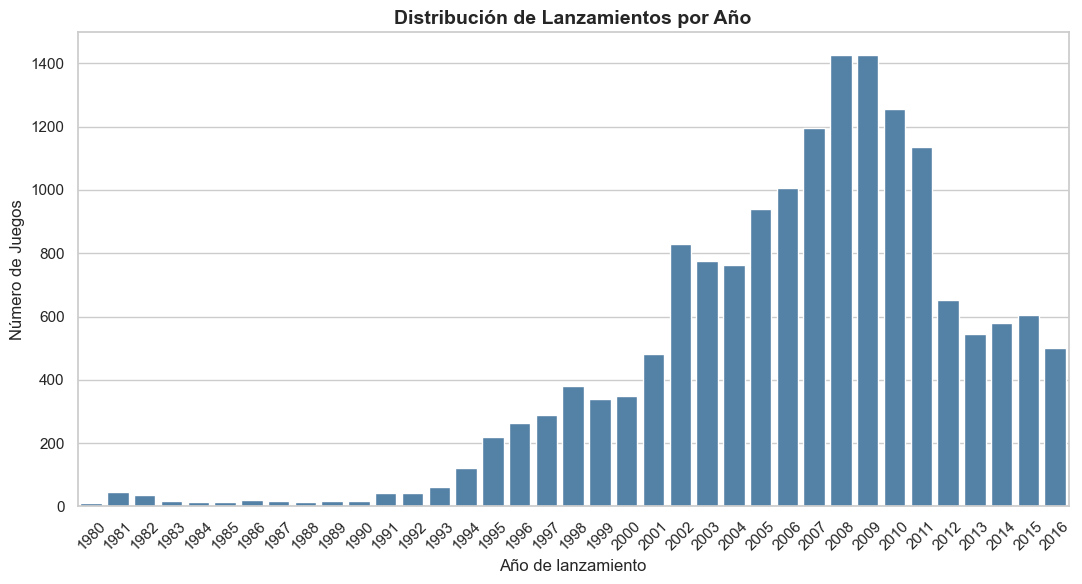

In [6]:
# Distribución de lanzamientos por año (Seaborn)
count_by_year = games_df["year_of_release"].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(x=count_by_year.index, y = count_by_year.values, color = "steelblue", ax = ax)
ax.set_title("Distribución de Lanzamientos por Año", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Año de lanzamiento")
ax.set_ylabel("Número de Juegos")
ax.tick_params(axis = "x", rotation = 45)
plt.tight_layout()
plt.show()

Al observar la distribución de lanzamientos, se identifican tres etapas claras en la industria:
* **Auge (2002 - 2011):** Crecimiento masivo con un pico histórico en 2008-2009.
* **Transición (2012 - 2015):** Contracción del volumen de lanzamientos, posiblemente debido al aumento en los costos de desarrollo (Era AAA), el auge del mercado móvil y pc, y la entrada de nuevas generaciones de consolas.
* **Incertidumbre (2016):** Descenso pronunciado que sugiere datos parciales o incompletos por la fecha de extracción.

**Decisión Estratégica:** Para la planificación de la campaña 2017, nos enfocaremos en los datos a partir de 2012. Este periodo representa el mercado moderno y el ciclo de vida actual de las consolas líderes, eliminando el ruido estadístico de plataformas obsoletas.

#### 2.2. Análisis de Ventas por Plataforma y Ciclos de Vida

Habiendo determinado que la industria ha pasado por diversas etapas de madurez, ahora es crucial identificar qué plataformas han liderado el mercado y cómo se comportan sus ciclos de vida. En el mundo de los videojuegos, el hardware es el ecosistema que dicta el éxito del software.

El objetivo es determinar la "esperanza de vida" promedio de una consola, lo cual es vital para decidir si una plataforma en 2017 está en su apogeo o entrando en obsolescencia.

##### 2.2.1. Identificación de Líderes Históricos

Primero, extraeré las plataformas con mayores ventas totales para comprender quiénes han sido los "titanes" de la industria. Esto nos da un panorama global antes de entrar en los detalles temporales.

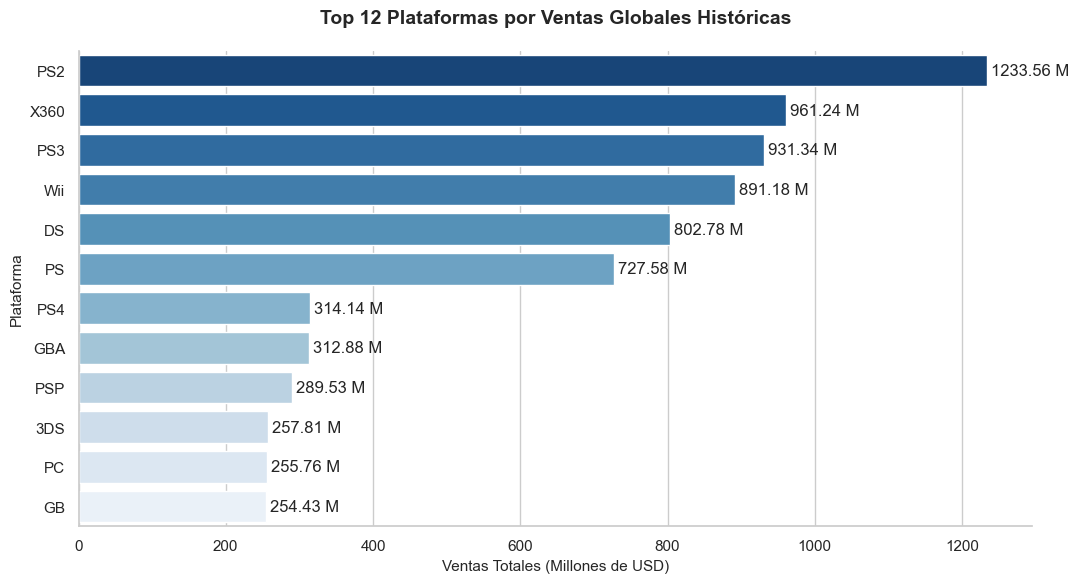

In [7]:
# Extracción de las 12 plataformas con mayores ventas totales históricas
top_platforms_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(12)
# Visualización de los líderes históricos
plt.figure(figsize=(11, 6))
ax = sns.barplot(
    x=top_platforms_sales.values, 
    y=top_platforms_sales.index, 
    hue=top_platforms_sales.index, # Mantenemos hue para evitar el FutureWarning
    palette="Blues_r", 
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%.2f M')

plt.title('Top 12 Plataformas por Ventas Globales Históricas', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Ventas Totales (Millones de USD)', fontsize=11)
plt.ylabel('Plataforma', fontsize=11)

sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

##### 2.2.2. Evolución Anual de Ingresos y Determinación del Ciclo de Vida

Con los líderes identificados, ahora analizaré su distribución de ventas a lo largo de los años. Este paso es fundamental para detectar plataformas que solían ser populares pero que ahora no tienen ventas, y para calcular cuánto tiempo le toma a una nueva plataforma aparecer y a una antigua desaparecer.

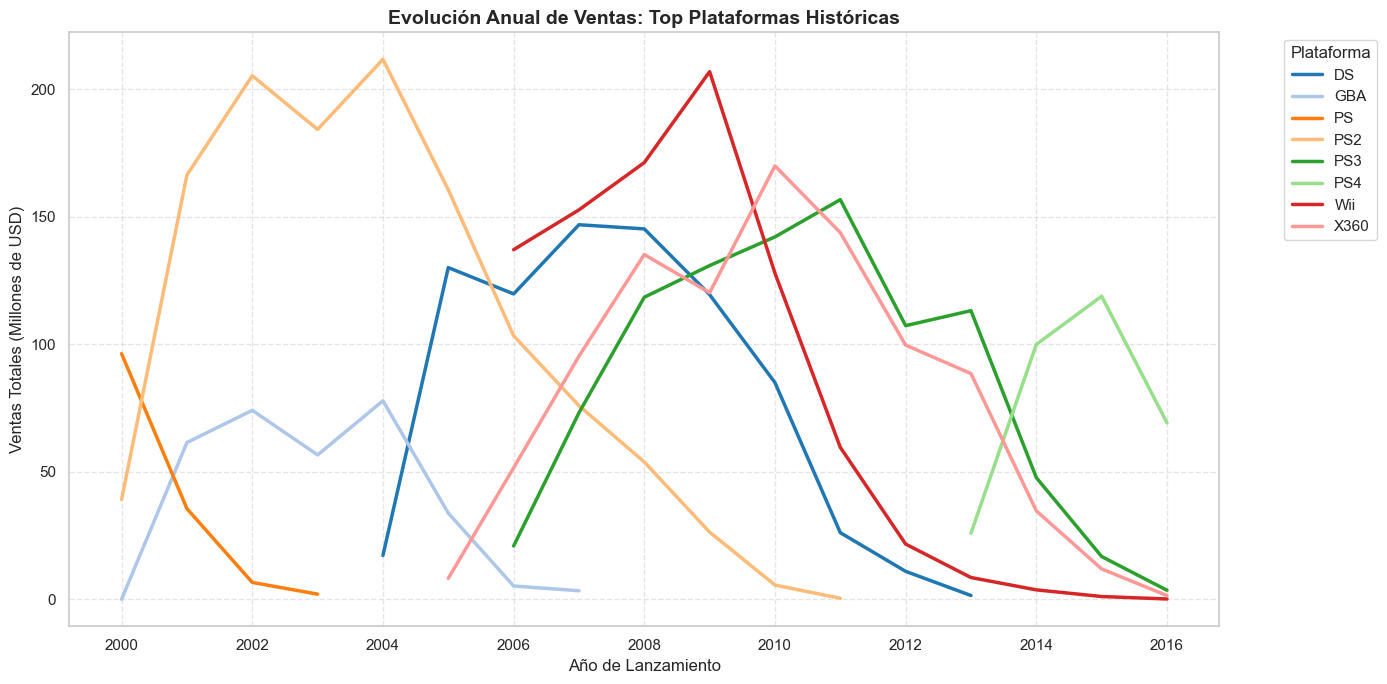

Análisis de Longevidad:
- El ciclo de vida promedio de una plataforma es de aproximadamente 8.4 años.


In [8]:
top_8_list = top_platforms_sales.index[:8]

platform_yearly_sales = (
    games_df[(games_df['platform'].isin(top_8_list)) & (games_df['year_of_release'] > 1999)]
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
) # Sin fillna para ver los datos crudos

plt.figure(figsize = (14, 7))
sns.lineplot(data = platform_yearly_sales, dashes = False, palette = "tab20", linewidth = 2.5)

plt.title('Evolución Anual de Ventas: Top Plataformas Históricas', fontsize = 14, fontweight = 'bold')
plt.xlabel('Año de Lanzamiento', fontsize = 12)
plt.ylabel('Ventas Totales (Millones de USD)', fontsize = 12)
plt.legend(title = 'Plataforma', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True, which = 'major', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

# Cálculo del Ciclo de Vida Promedio
# Calculamos la diferencia entre el último y primer año de ventas para cada plataforma
platform_lifespan = games_df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

# Filtramos plataformas que tengan un ciclo de vida real (más de 0 años)
avg_lifespan = platform_lifespan[platform_lifespan['lifespan'] > 0]['lifespan'].mean()

print("Análisis de Longevidad:")
print(f"- El ciclo de vida promedio de una plataforma es de aproximadamente {avg_lifespan:.1f} años.")

##### 2.2.3. Interpretación del Ciclo de Vida y Dinámica del Mercado

El análisis de las plataformas líderes entre 2000 y 2016 revela una dinámica cíclica de surgimiento, auge y obsolescencia que define a la industria:
* **Sustitución Generacional:** Las plataformas dominantes como PS2, Wii, X360, PS3, XBOX 360 y DS muestran un comportamiento de "campana". Identificamos que el liderazgo es transitorio; por ejemplo, el declive de la PS2 (líder indiscutible hasta 2005) preparó el terreno para la explosión de ventas de la PS3 y Xbox 360.
* **Esperanza de Vida del Hardware:** La vida útil promedio de una plataforma se sitúa en aproximadamente 8.4 años. Este dato es fundamental para nuestra estrategia: nos indica que una consola lanzada hace más de 4 o 5 años ya ha superado su pico de rentabilidad y se encamina hacia el reemplazo por hardware de nueva generación.
* **Estado Actual (2016):** Observamos que la gran mayoría de los titanes históricos han desaparecido o presentan ventas marginales en el último año. La PS4 destaca como la plataforma con mayor relevancia actual, capturando el mercado que anteriormente pertenecía a la PS3.

**Conclusión Estratégica:** Este comportamiento confirma que analizar datos anteriores a 2012 sería contraproducente, ya que estaríamos incluyendo el auge de consolas que para 2017 estarán obsoletas. Nos enfocaremos en el periodo de 2012-2016 para capturar únicamente la dinámica de las plataformas vigentes.

#### 2.3. Análisis del Periodo Relevante (2012 - 2016)

Para planificar la campaña de 2017, trabajaré exclusivamente con los datos a partir de 2012. Este recorte nos permite analizar plataformas que aún tienen presencia en el mercado y entender la transición hacia la generación actual (PS4, Xbox One, PC), eliminando el ruido de hardware que ya no compite por presupuesto publicitario.

##### 2.3.1. Identificación de Líderes Actuales y Dinámica de Crecimiento

En esta sección, determinaré qué plataformas encabezan las ventas en el mercado moderno. Es crucial identificar no solo quién ha vendido más en el acumulado, sino quién mantiene el impulso hacia el cierre de 2016, considerando que los datos del último año son un recorte parcial pero indicativo.

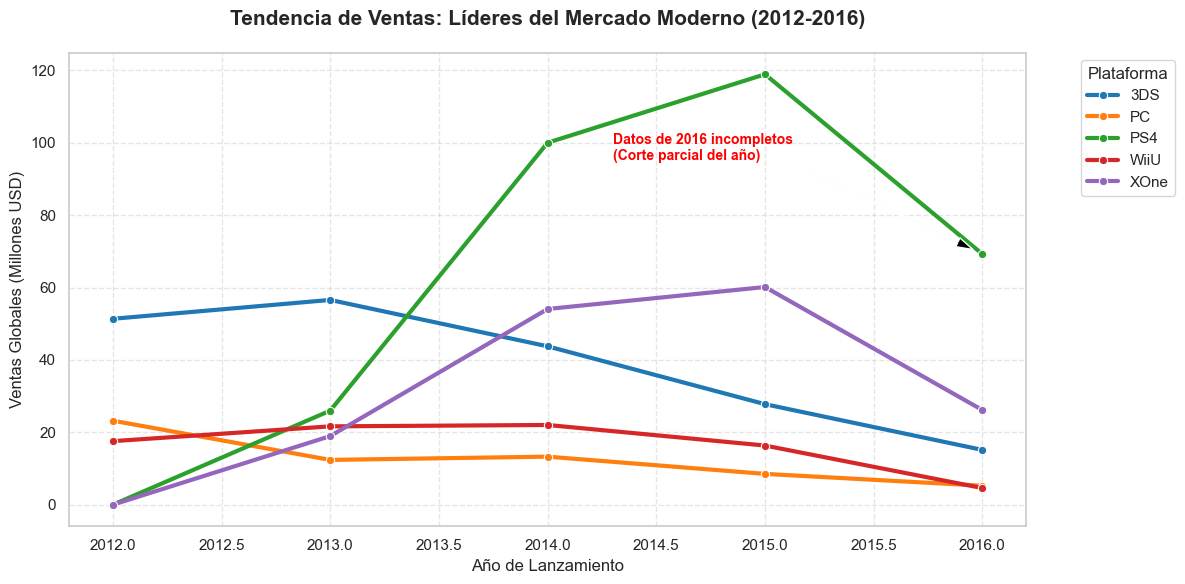

Ventas Totales Acumuladas (Periodo 2012-2016):
platform
PS4     314.14
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65


In [9]:
# Filtro del Periodo Moderno (A partir de 2012)
df_modern = games_df[games_df['year_of_release'] >= 2012].copy()

# Selección Estratégica de Plataformas (Criterio de volumen + relevancia estratégica)
# Filtramos solo por los líderes que mencionaste para un análisis limpio
target_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']
df_leaders = df_modern[df_modern['platform'].isin(target_platforms)]

# Creación de la Tabla de Dinámica de Ventas
# Usamos fillna(0) para que las curvas de declive sean visibles hacia 2016
modern_trends = (
    df_leaders.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .fillna(0)
)

# Visualización Profesional de Tendencias
plt.figure(figsize = (12, 6))
# Usamos marcadores 'o' para identificar los puntos de datos anuales exactos
sns.lineplot(data = modern_trends, marker = 'o', linewidth = 3, palette = 'tab10', dashes = False)

# Estética y Títulos
plt.title('Tendencia de Ventas: Líderes del Mercado Moderno (2012-2016)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Globales (Millones USD)', fontsize=12)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Anotación crítica sobre la calidad de los datos (Indispensable para un Senior)
plt.annotate('Datos de 2016 incompletos\n(Corte parcial del año)', 
             xy=(2016, modern_trends.loc[2016].max()), 
             xytext=(2014.3, modern_trends.values.max() * 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=7),
             fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Resumen Numérico para Validar Decisiones
print("Ventas Totales Acumuladas (Periodo 2012-2016):")
summary = df_leaders.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(summary.to_string())

##### Hallazgos sobre Líderes y Tendencias Actuales

Luego de analizar la dinámica de ventas entre 2012 y 2016, podemos extraer las siguientes conclusiones estratégicas para la campaña 2017:
* **Liderazgo de Nueva Generación:** La PS4 es la líder indiscutible del periodo moderno, mostrando un crecimiento explosivo desde su lanzamiento en 2013. A pesar de la caída visual en 2016 (atribuida a datos incompletos), se mantiene muy por encima de su competidor más cercano, la Xbox One.
* **Declive vs. Estabilidad:** Mientras que consolas como la 3DS muestran una tendencia a la baja tras un pico inicial, la PC mantiene una línea de ventas notablemente estable a lo largo de los años. Esto sugiere que, aunque el PC no tiene los picos masivos de las consolas, es un mercado resiliente y predecible.
* **Potencial de Inversión:** Para 2017, el enfoque publicitario debe priorizar a la PS4 y Xbox One, ya que se encuentran en la fase de madurez de su ciclo de vida, donde la base de usuarios es lo suficientemente grande para generar retornos masivos.

**Nota:** Dada la naturaleza de los datos, es muy posible que se trate únicamente de ventas físicas de videojuegos, lo que puede alterar la perspectiva del mercado global. Sin embargo, tras un análisis cualitativo, opté por centrar la estrategia en estas plataformas líderes por su volumen y relevancia.

##### 2.3.2. Distribución de Ventas por Plataforma (Rentabilidad por Título)

Ahora que sabemos qué plataformas venden más en volumen, debemos entender cómo se distribuyen esas ventas por cada juego. El volumen total puede estar inflado por unos pocos "hits" masivos o por una gran cantidad de juegos mediocres.

Para visualizar esto, utilizaremos diagramas de caja (Boxplots). Esto nos permitirá comparar:
* **La mediana** de ventas (el rendimiento esperado de un juego promedio).
* **La dispersión** y los **outliers** (el potencial de tener éxitos de ventas extraordinarios).

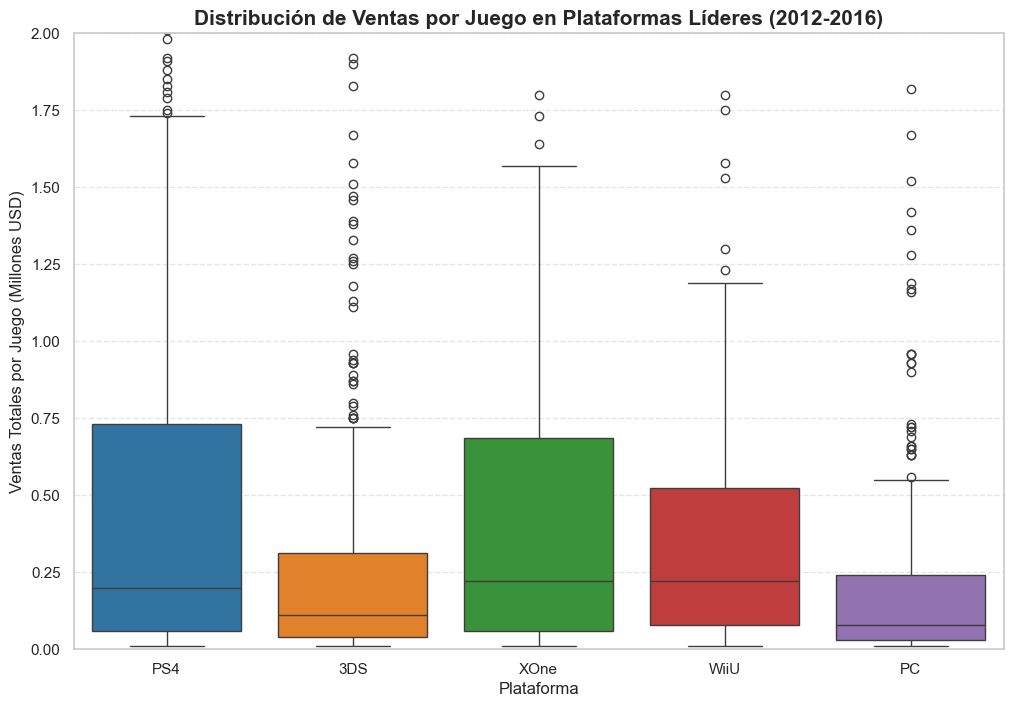

Estadísticas descriptivas de ventas por plataforma:


,mean,50%,std,max
platform,,,,
3DS,0.491439,0.11,1.387161,14.60
PC,0.250600,0.08,0.494640,5.14
PS4,0.801378,0.20,1.609456,14.63
WiiU,0.559116,0.22,1.058836,7.09
XOne,0.645020,0.22,1.036139,7.39


In [10]:
df_boxplots = df_modern[df_modern['platform'].isin(target_platforms)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_boxplots, x='platform', y='total_sales', palette='tab10', hue='platform', legend=False)

# Ajustamos el límite en Y para ver mejor las cajas (ya que los outliers estiran mucho el gráfico)
plt.ylim(0, 2) 

plt.title('Distribución de Ventas por Juego en Plataformas Líderes (2012-2016)', fontsize=15, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales por Juego (Millones USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Resumen estadístico para complementar la visualización
print("Estadísticas descriptivas de ventas por plataforma:")
display(df_boxplots.groupby('platform')['total_sales'].describe()[['mean', '50%', 'std', 'max']])

##### Análisis de Dispersión y Rentabilidad por Título

Al analizar los diagramas de caja, descubrimos que el volumen total de ventas no es la única métrica de éxito. La estructura de rentabilidad por juego nos revela lo siguiente:
* **Rendimiento Típico Consistente:** Las plataformas PS4, Xbox One y Wii U presentan medianas de ventas muy similares (~0.21M - 0.22M USD). Esto indica que, a nivel de "juego promedio", el potencial de retorno es equiparable entre estas consolas de sobremesa.
* **Sesgo Positivo y Dispersión:** Todas las plataformas muestran un marcado sesgo positivo. La dispersión es masiva, lo que confirma que la industria depende de unos pocos éxitos masivos que jalan el promedio hacia arriba, mientras la mayoría de los títulos tienen ventas modestas.
* **Liderazgo en "Hits":** La PS4 no solo lidera en volumen, sino que posee los outliers más extremos (juegos con ventas extraordinarias), seguida por Xbox One. Esto la posiciona como la plataforma con mayor "techo" de ganancia.
* **El Potencial de la 3DS:** Es notable la cantidad de outliers en la 3DS. Como bien observamos, al ser una plataforma portátil que depende fuertemente del formato físico, mantiene una dinámica de ventas muy resiliente. Sigue siendo una opción atractiva para lanzamientos de nicho con alto potencial de coleccionismo.

#### 2.4. Impacto de las Reseñas en las Ventas

Ya sabemos en qué plataformas invertir. Ahora la pregunta estratégica es: *¿Qué impulsa las ventas en estos ecosistemas?* No debemos asumir que las buenas reseñas garantizan el éxito comercial; debemos demostrarlo estadísticamente. Utilizaré a la PS4 (líder del mercado actual) como caso de estudio para cuantificar la influencia de la crítica profesional y la opinión de los usuarios en los ingresos.

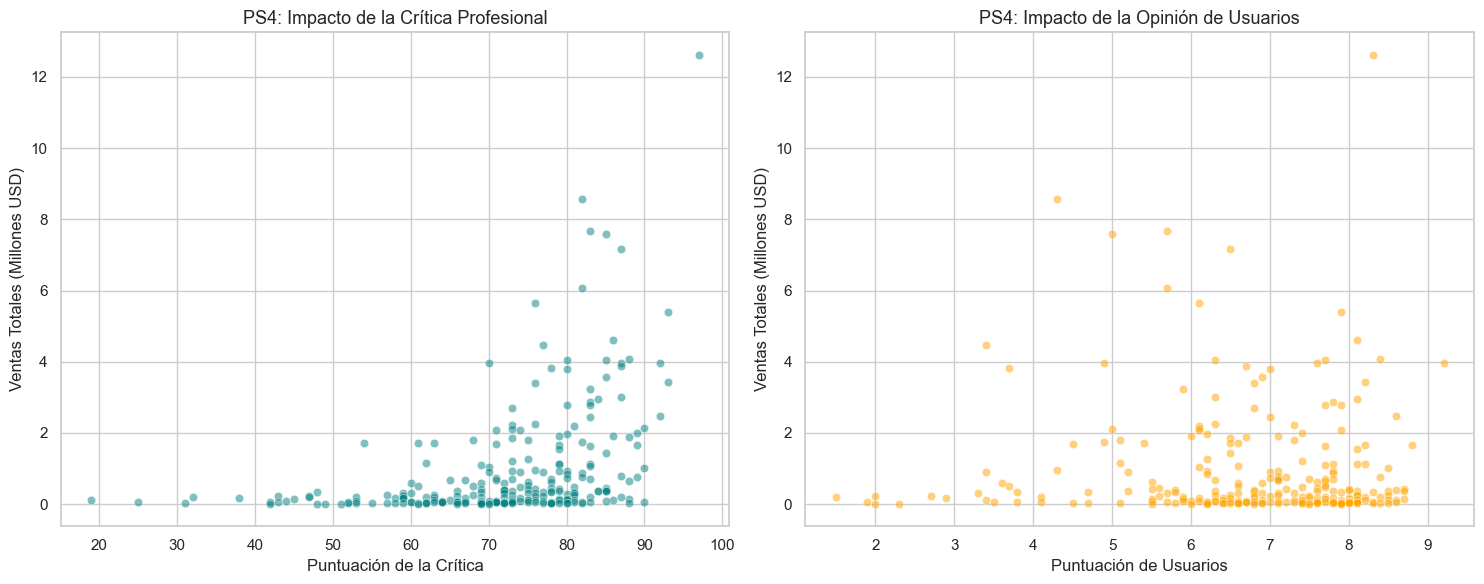

Correlación (Críticos): 0.41
Correlación (Usuarios): -0.03


In [11]:
# Filtramos datos para la plataforma líder
ps4_data = df_modern[(df_modern['platform'] == 'PS4') & (df_modern['user_score'].notna()) & (df_modern['critic_score'].notna())]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Críticos vs Ventas
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales', alpha=0.5, ax=ax[0], color='teal')
ax[0].set_title('PS4: Impacto de la Crítica Profesional', fontsize=13)
ax[0].set_xlabel('Puntuación de la Crítica')
ax[0].set_ylabel('Ventas Totales (Millones USD)')

# Gráfico 2: Usuarios vs Ventas
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales', alpha=0.5, ax=ax[1], color='orange')
ax[1].set_title('PS4: Impacto de la Opinión de Usuarios', fontsize=13)
ax[1].set_xlabel('Puntuación de Usuarios')
ax[1].set_ylabel('Ventas Totales (Millones USD)')

plt.tight_layout()
plt.show()

# Coeficientes de Correlación de Pearson
print(f"Correlación (Críticos): {ps4_data['critic_score'].corr(ps4_data['total_sales']):.2f}")
print(f"Correlación (Usuarios): {ps4_data['user_score'].corr(ps4_data['total_sales']):.2f}")

**Interpretación de la Influencia de Reseñas**

Al analizar los coeficientes de correlación y los diagramas de dispersión para PS4, los resultados revelan una dinámica interesante:
* **Crítica Profesional (Moderada):** Existe una correlación positiva moderada (~0.41). Esto sugiere que las calificaciones de expertos tienen cierto peso en el éxito comercial, posiblemente influyendo en la visibilidad inicial y el "hype" del lanzamiento.
* **Opinión de Usuarios (Nula):** La correlación de -0.03 indica que no hay una relación lineal entre el puntaje de los usuarios y las ventas finales. Un juego puede ser un éxito masivo en ventas y tener reseñas de usuarios bajas (o viceversa), lo que sugiere que el consumidor promedio de PS4 no basa su decisión de compra primordialmente en los agregadores de reseñas de la comunidad.

#### 2.5. Análisis de Títulos Multiplataforma

Para validar la fuerza real de cada ecosistema, realizaré una comparativa de ventas utilizando únicamente títulos que fueron lanzados en múltiples plataformas simultáneamente (PS4, Xbox One, PC, WiiU y 3DS). Este análisis "aisla" la calidad del software y nos permite observar qué hardware es capaz de generar mayor volumen de negocio con el mismo producto.

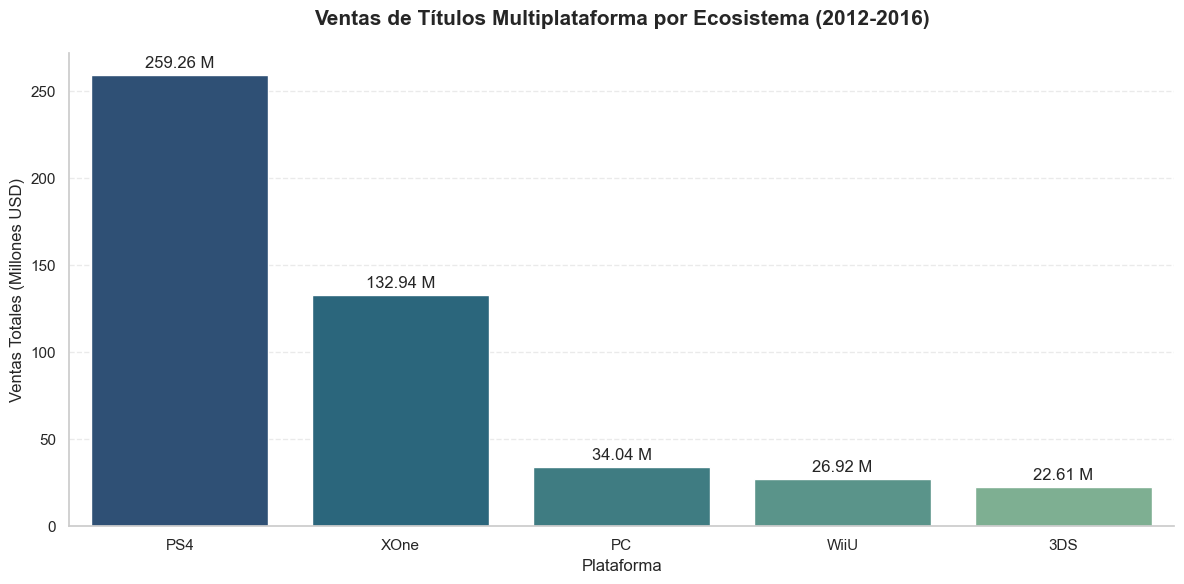

Resumen de Ventas Multiplataforma (% del total):
  PS4: 54.49%
  XOne: 27.94%
  PC: 7.15%
  WiiU: 5.66%
  3DS: 4.75%


In [12]:
# Definimos nuestro set de plataformas estratégicas
target_platforms = ['PS4', 'XOne', 'PC', 'WiiU', '3DS']

# Identificamos títulos que aparecen en al menos 2 plataformas de nuestro set
games_counts = df_modern[df_modern['platform'].isin(target_platforms)].groupby('name')['platform'].nunique()
multi_titles = games_counts[games_counts >= 2].index

# Filtramos el dataframe para estos títulos y plataformas seleccionadas
df_multi_compare = df_modern[
    (df_modern['name'].isin(multi_titles)) & 
    (df_modern['platform'].isin(target_platforms))
]

# Creación del resumen para el gráfico
multi_sales_summary = (df_multi_compare.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
)

# Visualización
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=multi_sales_summary.index, 
    y=multi_sales_summary.values, 
    hue=multi_sales_summary.index,
    palette='crest_r',
    legend=False
)

# Añadimos etiquetas de datos
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f M', padding=3)

plt.title('Ventas de Títulos Multiplataforma por Ecosistema (2012-2016)', fontsize=15, fontweight='bold', pad=20)
plt.ylabel('Ventas Totales (Millones USD)', fontsize=12)
plt.xlabel('Plataforma', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

plt.tight_layout()
plt.show()

# Comparativa porcentual para el reporte
total_multi = multi_sales_summary.sum()
pct_multi = (multi_sales_summary / total_multi * 100).round(2)
print("Resumen de Ventas Multiplataforma (% del total):")
for plataforma, pct in pct_multi.items():
    print(f"  {plataforma}: {pct}%")


Al aislar el rendimiento de títulos compartidos, eliminamos el sesgo de la "calidad del software" para observar exclusivamente la capacidad de cada hardware para monetizar un mismo producto. Los hallazgos para el periodo 2012-2016 son determinantes:
* **Hegemonía de PS4:** La consola de Sony captura el 54.49% del volumen total de ventas en el segmento multiplataforma, dominando por casi el doble a su competidor más cercano, la Xbox One (27.94%).
* **Contraste de Ecosistemas:** La brecha se ensancha dramáticamente frente a las demás plataformas, donde la PS4 genera entre 7 y 11 veces más ingresos que el PC (7.15%), la WiiU (5.66%) o la 3DS (4.75%) con los mismos títulos lanzados simultáneamente.

**Visión Estratégica 2017:** Estos datos confirman que la PS4 es el ecosistema con mayor "fuerza de tracción" comercial. Aunque la Xbox One mantiene una cuota relevante, la PS4 es el destino predilecto para maximizar el alcance de los grandes lanzamientos multiplataforma.

#### 2.6. Distribución de Ventas por Género

En esta sección analizaré la eficiencia de cada género. No siempre el género con más lanzamientos es el que más dinero deja. Identificaré:
* **Volumen vs. Rentabilidad:** ¿Qué géneros dominan la cantidad de juegos y cuáles dominan los ingresos totales?
* **Ventas Promedio:** Compararemos las ventas medias por juego en cada género (esto nos dirá qué categorías son "apuestas seguras" y cuáles dependen de tener muchísimos títulos para sumar volumen).

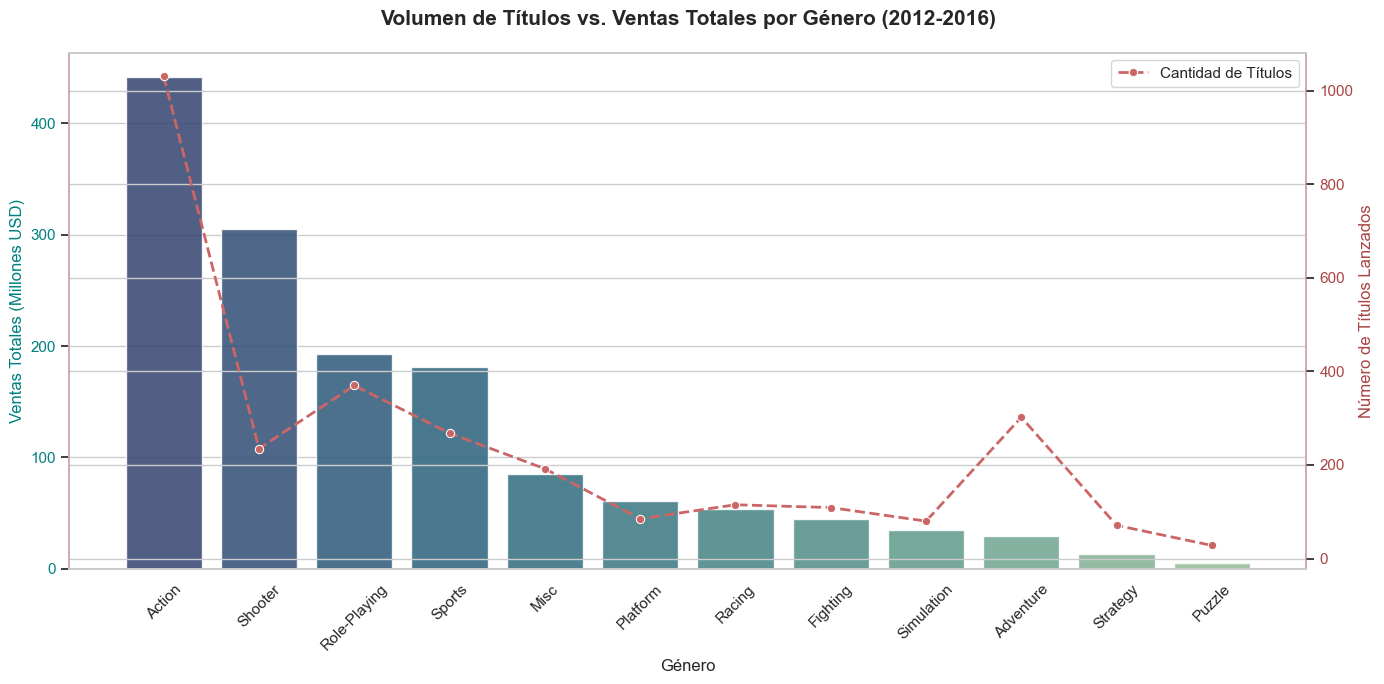

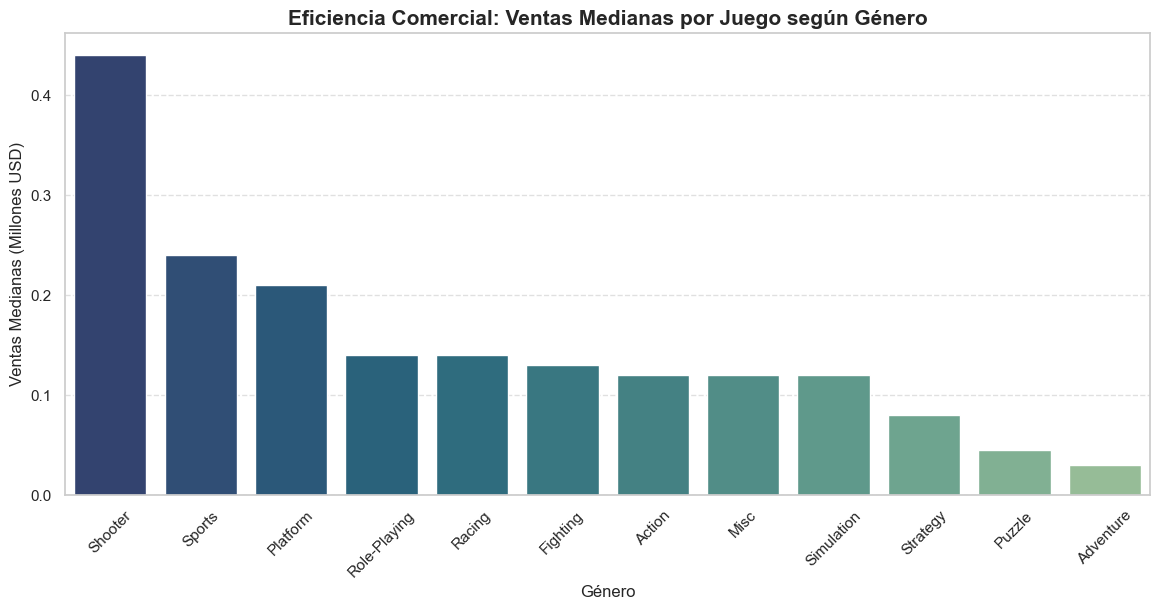

Top 5 Géneros por Rentabilidad Promedio (Mediana):
genre
Shooter         0.44
Sports          0.24
Platform        0.21
Role-Playing    0.14
Racing          0.14
Name: median, dtype: float64


In [13]:
# Agrupación por género para obtener métricas de volumen y rentabilidad
genre_stats = (
    df_modern.groupby('genre')['total_sales']
    .agg(['count', 'sum', 'mean', 'median'])
    .sort_values(by='sum', ascending=False)
)

# Configuración de la visualización (Dual: Volumen vs Ventas Totales)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Ventas Totales
sns.barplot(x=genre_stats.index, y=genre_stats['sum'], ax=ax1, hue=genre_stats.index, palette='crest_r', legend=False, alpha=0.85)
ax1.set_ylabel('Ventas Totales (Millones USD)', fontsize=12, color='teal')
ax1.set_xlabel('Género', fontsize=12)
ax1.tick_params(axis='y', labelcolor='teal')

# Línea para Volumen de Juegos (difuminada, trazo discontinuo)
ax2 = ax1.twinx()
sns.lineplot(x=genre_stats.index, y=genre_stats['count'], ax=ax2, color='#cc6666', marker='o', linewidth=2, linestyle='--', alpha=1, label='Cantidad de Títulos')
ax2.set_ylabel('Número de Títulos Lanzados', fontsize=12, color='#aa4444')
ax2.tick_params(axis='y', labelcolor='#aa4444')
for spine in ('left', 'right'):
    if ax2.spines[spine].get_visible():
        ax2.spines[spine].set_color('#cc9999')
        ax2.spines[spine].set_alpha(0.7)

plt.title('Volumen de Títulos vs. Ventas Totales por Género (2012-2016)', fontsize=15, fontweight='bold', pad=20)
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

# Visualización de la Eficiencia (Ventas Promedio por Juego)
plt.figure(figsize=(14, 6))
# Median: Evita que los outliers distorsionen la realidad
genre_efficiency = genre_stats.sort_values(by='median', ascending=False) 

sns.barplot(x=genre_efficiency.index, y=genre_efficiency['median'], hue=genre_efficiency.index, palette='crest_r', legend=False)
plt.title('Eficiencia Comercial: Ventas Medianas por Juego según Género', fontsize=15, fontweight='bold')
plt.ylabel('Ventas Medianas (Millones USD)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Resumen numérico para el reporte
print("Top 5 Géneros por Rentabilidad Promedio (Mediana):")
print(genre_efficiency['median'].head(5))

**Hallazgos: Volumen vs. Rentabilidad por Género**

Al cruzar la cantidad de lanzamientos con los ingresos generados, observamos una clara disparidad entre la oferta y el éxito comercial:
* **Acción:** El Gigante de Volumen. Es el género más prolífico con más de 1,000 títulos lanzados y las ventas totales más altas (~440M USD). Sin embargo, este éxito es engañoso, ya que depende de una saturación masiva de mercado y de unos pocos "hits" que inflan el total.
* **Shooter:** El Líder en Eficiencia. Presenta una dinámica opuesta; con apenas una quinta parte de los lanzamientos de Acción (~200 títulos), logra ventas totales cercanas a los 300M USD. Esto sugiere que es un género donde el consumidor está más dispuesto a gastar por cada título individual.

**Eficiencia Comercial y Selección de Estrategia**

El análisis basado en la mediana de ventas es el que realmente dicta dónde está la inversión más segura:
* **Calidad sobre Cantidad:** Los Shooters no solo venden mucho en total, sino que tienen la mediana de ventas más alta de la industria (~0.44M USD). Esto los convierte en el género con el "piso" de rentabilidad más elevado para un juego promedio.
* **La Dilución de la Acción:** A pesar de su volumen total, la mediana del género Action es notablemente baja (~0.12M USD). Esto confirma que el mercado está saturado y que la gran mayoría de los juegos de acción pasan desapercibidos, siendo una apuesta mucho más arriesgada que un Shooter o un juego de Deportes.

**Conclusión Estratégica** 

Para 2017, la recomendación no es solo centrarse en los géneros con más ventas acumuladas, sino priorizar los de alta eficiencia. Mientras que la Acción ayuda a movilizar inventario masivo, los Shooters, Sports y Role-Playing son los motores que garantizan un retorno de inversión (ROI) más predecible por cada título individual.

### 3. Perfil de Usuario por Región (NA, EU, JP)

En esta sección, realizaré una disección del mercado dividiéndolo en sus tres regiones principales: Norteamérica (NA), Europa (EU) y Japón (JP). El objetivo es identificar las particularidades culturales y de consumo en cada territorio para diseñar una estrategia de marketing "quirúrgica" en 2017, evitando el error de aplicar una estrategia única para mercados con gustos tan diversos.

#### 3.1. Análisis de Cuota de Mercado por Plataforma

Identificaré las 5 plataformas líderes en cada región para observar el dominio de marca. Esto nos permitirá entender, por ejemplo, si la hegemonía de la PS4 es global o si existen mercados donde competidores como la 3DS o la Xbox One tienen una ventaja competitiva local.

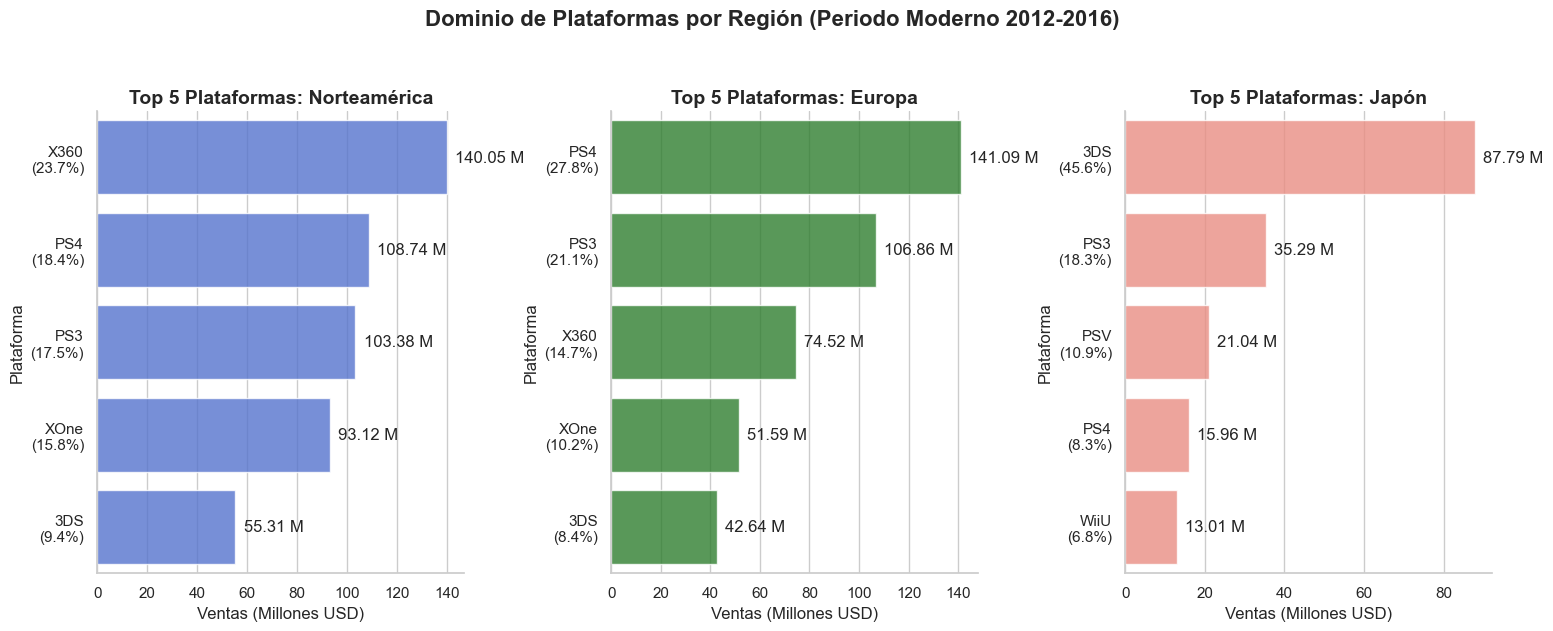

In [14]:
# Definición de regiones y colores solicitados
regions = {
    'na_sales': {'name': 'Norteamérica', 'color': 'royalblue'},
    'eu_sales': {'name': 'Europa', 'color': 'forestgreen'},
    'jp_sales': {'name': 'Japón', 'color': 'salmon'}
}

# Configuración de la figura para una comparativa lateral
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

for i, (col, info) in enumerate(regions.items()):
    # Obtenemos el Top 5 por región
    top_5 = (df_modern.groupby('platform')[col]
             .sum()
             .sort_values(ascending=False)
             .head(5))
    
    # Cálculo de cuota porcentual dentro del Top 5 regional
    total_region = df_modern[col].sum()
    labels = [f"{p}\n({(v/total_region*100):.1f}%)" for p, v in top_5.items()]
    
    # Visualización
    sns.barplot(x=top_5.values, y=top_5.index, ax=axes[i], color=info['color'], alpha=0.8)
    axes[i].bar_label(axes[i].containers[0], fmt='%.2f M', padding=6)
    
    # Personalización de cada subgráfico
    axes[i].set_title(f"Top 5 Plataformas: {info['name']}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Ventas (Millones USD)')
    axes[i].set_ylabel('Plataforma')
    axes[i].set_yticks(range(len(labels)))
    axes[i].set_yticklabels(labels)
    sns.despine(ax=axes[i])

plt.suptitle('Dominio de Plataformas por Región (Periodo Moderno 2012-2016)', fontsize=16, fontweight='bold', y=1.05)
plt.show()

**Hallazgos: Perfil de Consumo Regional por Marca**

Al analizar el Top 5 de cada región, observamos que las preferencias de hardware están profundamente ligadas a la identidad regional y al tipo de ecosistema dominante:

**Norteamérica (NA): El Campo de Batalla**
* **Microsoft (Xbox)** lidera el mercado con una cuota combinada del 39.5% (X360 con 23.7% y XOne con 15.8%).
* **Sony (PlayStation)** mantiene una competencia cerrada con el 35.9% (PS4 con 18.4% y PS3 con 17.5%). Podemos notar como Sony gana terreno con la PS4.
* **Nintendo** ocupa una posición secundaria en este top, donde solo la 3DS logra destacar con un 9.4% de la cuota regional.

**Europa (EU): El Bastión de Sony**
* **Sony** ejerce un dominio casi absoluto con el 48.9% del mercado, impulsado fuertemente por la PS4 (27.8%), que es la plataforma líder en el continente.
* **Microsoft** retiene una presencia relevante pero distante con un 24.9% combinado entre sus dos generaciones.
* **Nintendo** mantiene una cuota similar a la de NA, con la 3DS representando el 8.4% de las ventas europeas.

**Japón (JP): El Reino Portátil de Nintendo**
* **Nintendo** es el líder indiscutible con un 52.4% de cuota combinada, destacando la 3DS como un fenómeno cultural que acapara el 45.6% de todas las ventas del país.
* **Sony** sobrevive gracias a la diversificación, sumando un 37.5% entre consolas de sobremesa y la portátil PSV (10.9%), la cual tiene en Japón su mercado más fuerte.
* **Microsoft** es inexistente en el Top 5 nipón, confirmando que la marca no ha logrado penetrar en las preferencias del consumidor local.

Esta disparidad exige estrategias diferenciadas. Mientras en NA y EU debemos apostar por el ecosistema PS4/Xbox, en Japón cualquier esfuerzo que ignore a la 3DS estaría destinado al fracaso. Además, el mercado nipón tiene una fuerte preferencia por marcas locales, como soliá ser en los estados unidos con las consolas de Microsoft antes de la llegada de la PS4.

#### 3.2. Preferencias de Género y Comportamiento Cultural

En esta etapa, analizaré el Top 5 de géneros más vendidos en cada territorio. El objetivo es determinar si la hegemonía global de la Acción y los Shooters se mantiene intacta en todas las regiones o si existen nichos culturales —especialmente en el mercado japonés— que requieran un catálogo de juegos completamente distinto para la campaña 2017.

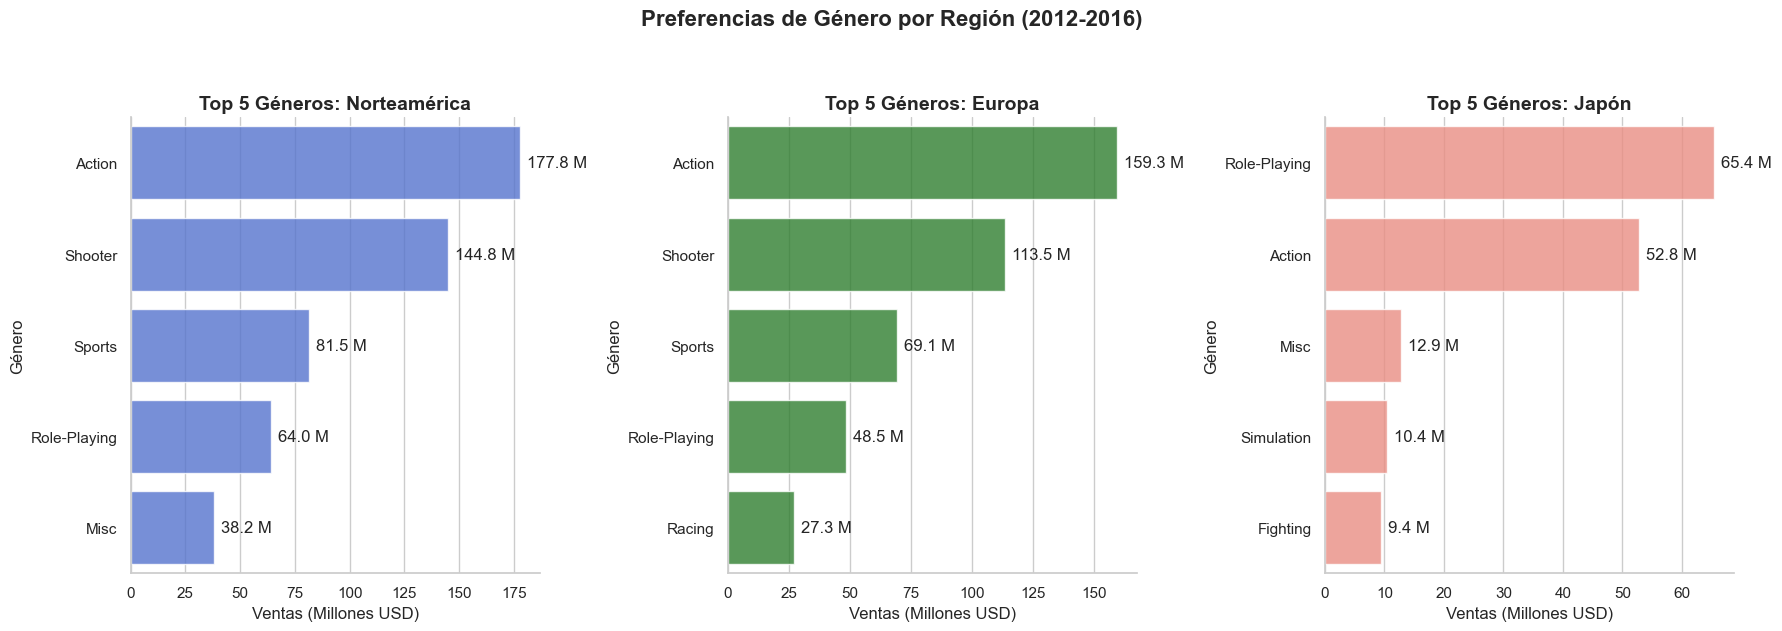

In [15]:
# Preparación de datos regionales para géneros
genre_regions = {
    'na_sales': {'name': 'Norteamérica', 'color': 'royalblue'},
    'eu_sales': {'name': 'Europa', 'color': 'forestgreen'},
    'jp_sales': {'name': 'Japón', 'color': 'salmon'}
}

# Configuración de la visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

for i, (col, info) in enumerate(genre_regions.items()):
    # Obtenemos el Top 5 de géneros por región
    top_genres = (df_modern.groupby('genre')[col]
                  .sum()
                  .sort_values(ascending=False)
                  .head(5))
    
    # Visualización con etiquetas de datos
    sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes[i], color=info['color'], alpha=0.8)
    axes[i].bar_label(axes[i].containers[0], fmt='%.1f M', padding=5)
    
    # Estética
    axes[i].set_title(f"Top 5 Géneros: {info['name']}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Ventas (Millones USD)')
    axes[i].set_ylabel('Género')
    sns.despine(ax=axes[i])

plt.suptitle('Preferencias de Género por Región (2012-2016)', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

**Hallazgos: Preferencias de Género y Sesgo Cultural**

El análisis de ventas por género confirma que el éxito de un título está fuertemente condicionado por la región geográfica. No existe un "estándar global" absoluto, sino dos bloques de consumo claramente diferenciados:

**Norteamérica (NA):** Mercado de la acción y el volumen. 
* Es la región con las ventas más altas en los géneros líderes.
* **Action** (177.8 M) y **Shooter** (144.8 M) dominan el panorama, reflejando una preferencia por experiencias de alto dinamismo y competencia.
* **Sports** (81.5 M) completa el podio, consolidando a NA como un mercado orientado al entretenimiento masivo y casual de consola de sobremesa.

**Europa (EU):** Espejo de Occidente.
* Muestra un comportamiento casi idéntico al de NA, con el mismo "Top 3": **Action** (159.3 M), **Shooter** (113.5 M) y **Sports** (69.1 M).
* La única diferencia notable en el Top 5 es la inclusión de Racing (27.3 M), que desplaza a los géneros misceláneos, indicando una afinidad cultural europea superior por los simuladores de conducción.

**Japón (JP):** La anomalía del Role-Playing. 
* Japón rompe la tendencia occidental; aquí el **Role-Playing** es el líder absoluto con 65.4 M, superando incluso a la **Acción** (52.8 M).
* Los géneros de **Shooter** y **Sports**, pilares en Occidente, son inexistentes en el Top 5 nipón.
* La presencia de **Simulation** y **Fighting** refuerza la identidad de un mercado que valora la durabilidad del juego y las mecánicas tradicionales de las franquicias locales.

Una campaña para 2017 debe ser bipolar: en NA y EU, el presupuesto debe concentrarse en el "Hype" de los Shooters y juegos de Acción. En Japón, cualquier estrategia que no tenga un fuerte componente de RPG o mecánicas locales ignorará al 52.4% de su mercado de plataformas líderes.

#### 3.3. Influencia de la Clasificación ESRB en las Ventas Regionales

Estudiaré cómo influye la clasificación por edades en el éxito comercial de cada territorio. Este análisis es vital para la logística y el inventario de la tienda, ya que nos permitirá ajustar la oferta de títulos según el perfil de madurez predominante en cada región.

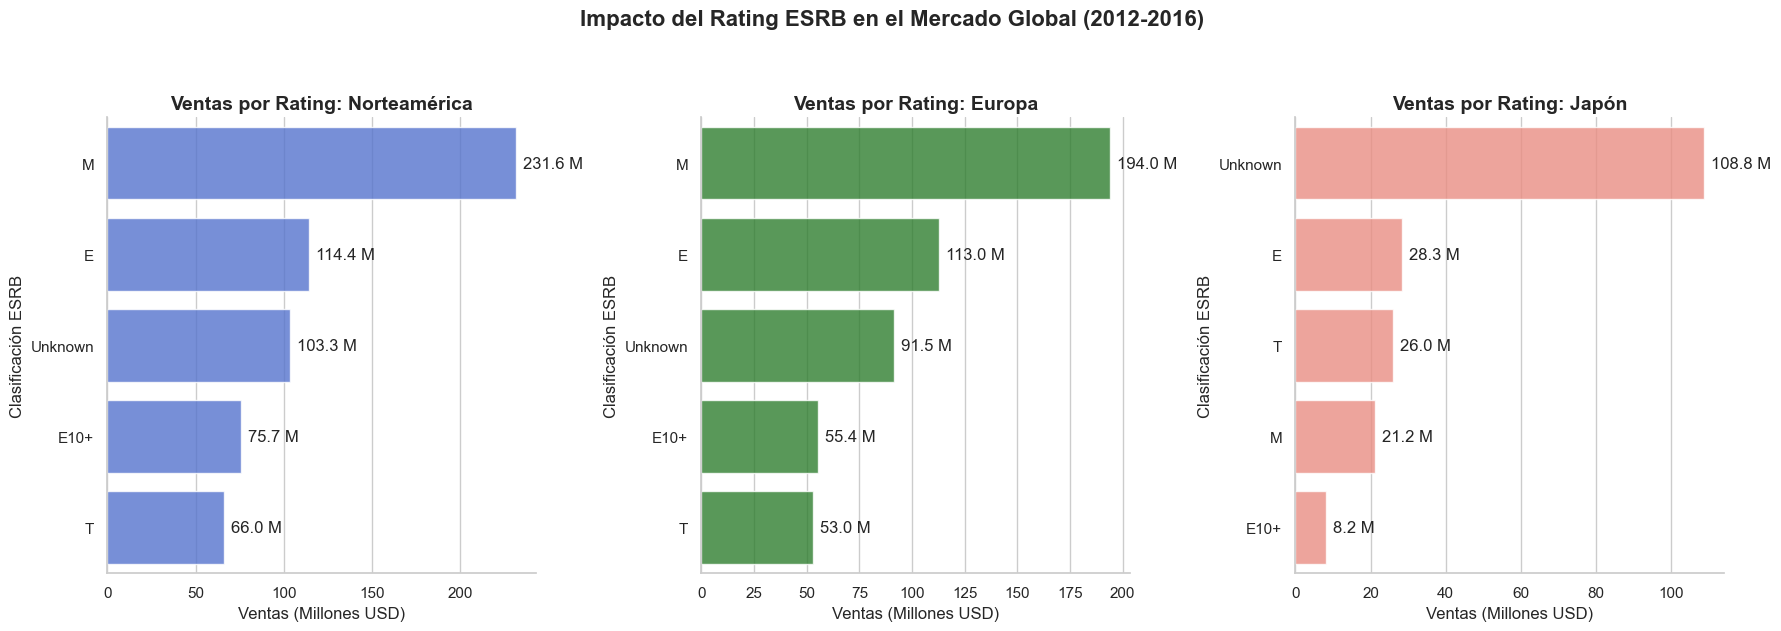

In [16]:
# Definición de regiones y paleta de colores corporativa
esrb_regions = {
    'na_sales': {'name': 'Norteamérica', 'color': 'royalblue'},
    'eu_sales': {'name': 'Europa', 'color': 'forestgreen'},
    'jp_sales': {'name': 'Japón', 'color': 'salmon'}
}

# Manejo de valores ausentes en Rating para evitar sesgos en la visualización
# Clasificamos los nulos como 'Unknown' para observar su peso regional
df_modern_esrb = df_modern.copy()
df_modern_esrb['rating'] = df_modern_esrb['rating'].fillna('Unknown')

# Configuración de la comparativa visual
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.4)

for i, (col, info) in enumerate(esrb_regions.items()):
    # Agrupamos por rating y sumamos ventas
    esrb_sales = (df_modern_esrb.groupby('rating')[col]
                  .sum()
                  .sort_values(ascending=False))
    
    # Visualización con etiquetas de datos para precisión Senior
    sns.barplot(x=esrb_sales.values, y=esrb_sales.index, ax=axes[i], color=info['color'], alpha=0.8)
    axes[i].bar_label(axes[i].containers[0], fmt='%.1f M', padding=5)
    
    # Estética y Títulos
    axes[i].set_title(f"Ventas por Rating: {info['name']}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Ventas (Millones USD)')
    axes[i].set_ylabel('Clasificación ESRB')
    sns.despine(ax=axes[i])

plt.suptitle('Impacto del Rating ESRB en el Mercado Global (2012-2016)', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

**Hallazgos: Perfil Demográfico por Clasificación (ESRB)**

El análisis de la clasificación por edades nos permite perfilar al consumidor final en cada territorio, revelando una clara división entre los mercados occidentales y el ecosistema nipón:

**Occidente (NA y EU):** El dominio del consumidor adulto
* Tanto en Norteamérica como en Europa, la clasificación M (Mature) es la reina absoluta de los ingresos, generando 231.6 M y 194.0 M respectivamente. Esto confirma que el motor financiero en Occidente son los títulos de Acción y Shooters dirigidos a un público mayor de 17 años.
* La clasificación E (Everyone) ocupa el segundo lugar (~114 M en ambas regiones), manteniendo una base sólida de consumo familiar y títulos de deportes.
* Es notable que incluso en estas regiones existe un volumen de ventas "Unknown" (~100 M), lo que sugiere una creciente presencia de títulos digitales o de nicho que no han sido categorizados.

**Japón (JP):** Un mercado con reglas propias
* El valor "Unknown" domina de forma masiva con 108.8 M, superando por más de tres veces a cualquier otra categoría. Este dato es fundamental: indica que la mayor parte del software vendido en Japón (especialmente para la 3DS) no se rige por la clasificación ESRB norteamericana, reforzando la naturaleza local y hermética de este mercado.
* Dentro de los títulos clasificados, las categorías E (Everyone) y T (Teen) tienen un peso equilibrado (~28 M y ~26 M), lo que se alinea con la preferencia japonesa por los RPGs y juegos de aventura que vimos anteriormente.

Para 2017, la estrategia en NA y EU debe priorizar los lanzamientos "Mature" en PS4 y Xbox. En Japón, el éxito depende de entender el contenido local que escapa a las clasificaciones occidentales, centrando los esfuerzos en el ecosistema portátil de Nintendo.

---

### 4. Validación Estadística: Pruebas de Hipótesis

En esta fase final, trascenderemos la observación visual para validar nuestras conclusiones mediante el rigor estadístico. El objetivo es determinar si las diferencias detectadas en los promedios de calificación son estadísticamente significativas o si podrían atribuirse al azar.

Para garantizar la integridad de los resultados, aplicaremos el siguiente protocolo en cada prueba:
1. **Planteamiento de Hipótesis ($H_0$ y $H_1$).**
2. **Validación de Supuestos:** Uso del Test de Levene para evaluar la igualdad de varianzas.
3. **Ejecución de la Prueba:** Empleo de la prueba T de Student (o Welch si las varianzas difieren).
4. **Evaluación de la Magnitud:** Cálculo del Cohen's d para medir el tamaño del efecto.
5. **Criterio de Decisión:** Nivel de significancia establecido en $\alpha = 0.05$.

Antes de comenzar, definiré algunas funciones para simplificar la ejecución de las pruebas y mantener la integridad de las mismas.

In [19]:
# Nivel de significancia para todas las pruebas 4.1, 4.2 y 4.3
alpha = 0.05

def _cohens_d(g1: pd.Series, g2: pd.Series) -> float: # Medición de impacto
    """Tamaño del efecto (Cohen's d) para dos muestras independientes (pooled std)."""
    n1, n2 = len(g1), len(g2)
    var1, var2 = g1.var(ddof=1), g2.var(ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    if pooled_std == 0:
        return 0.0
    return (g1.mean() - g2.mean()) / pooled_std

def run_hypothesis_test(g1: pd.Series, g2: pd.Series, name1: str, name2: str, alpha: float = alpha) -> tuple[float, float, float]:
    """
    Prueba de hipótesis H0: medias iguales vs H1: medias distintas (dos colas).
    Usa Levene para decidir Student (varianzas iguales) o Welch (varianzas distintas).
    No se usa Shapiro-Wilk ni Mann-Whitney para evitar warnings con muestras grandes.
    Retorna (estadístico_t, pvalue, cohens_d).
    """
    g1 = g1.dropna()
    g2 = g2.dropna()
    if g1.empty or g2.empty:
        raise ValueError("Al menos uno de los grupos está vacío tras eliminar NaN.")
    
    # Levene: igualdad de varianzas → decide Student vs Welch
    _, p_levene = st.levene(g1, g2)
    equal_var = p_levene > alpha
    test_name = "Student" if equal_var else "Welch"
    print(f"Levene (igualdad de varianzas): p = {p_levene:.4f} → {test_name} (equal_var = {equal_var})")

    # Prueba T de dos colas
    t_stat, p_value = st.ttest_ind(g1, g2, equal_var=equal_var)
    cohens_d = _cohens_d(g1, g2)
    print(f"Prueba T (dos colas): estadístico = {t_stat:.4f}, p = {p_value:.4f}, Cohen's d = {cohens_d:.4f}")

    # Decisión
    if p_value > alpha:
        print("Conclusión: Vale la hipótesis nula (H0). No hay evidencia de diferencia significativa entre las medias.")
    else:
        print("Conclusión: No vale la hipótesis nula (H0). Hay evidencia de diferencia significativa entre las medias.")

    return float(t_stat), float(p_value), cohens_d

#### 4.1. Prueba 1: Xbox One vs. PC (Calificaciones de Usuarios)

El objetivo es determinar si existe una diferencia real en la percepción de los usuarios entre estas dos plataformas, considerando que ambas comparten gran parte de su catálogo de juegos modernos.
* **Hipótesis Nula ($H_0$):** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales ($\mu_{XOne} = \mu_{PC}$).
* **Hipótesis Alternativa ($H_1$):** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes ($\mu_{XOne} \neq \mu_{PC}$).

In [22]:
# 4.1 Xbox One vs PC (user_score)
xone_scores = df_modern.loc[df_modern["platform"] == "XOne", "user_score"]
pc_scores = df_modern.loc[df_modern["platform"] == "PC", "user_score"]
print("Prueba 1: Xbox One vs PC (calificaciones de usuarios)\n")
run_hypothesis_test(xone_scores, pc_scores, "Xbox One", "PC")

Prueba 1: Xbox One vs PC (calificaciones de usuarios)

Levene (igualdad de varianzas): p = 0.0125 → Welch (equal_var = False)
Prueba T (dos colas): estadístico = 0.5999, p = 0.5490, Cohen's d = 0.0603
Conclusión: Vale la hipótesis nula (H0). No hay evidencia de diferencia significativa entre las medias.


(0.5998585993590415, 0.5489537965134913, np.float64(0.060328643851653034))

**Interpretación de Resultados Estadísticos : Prueba 1**

**Resultado:** $p$-value = 0.5490 | Cohen's d = 0.0603

**Análisis Estadístico:** Al ser el $p$-value muy superior al nivel de significancia ($\alpha = 0.05$), no podemos rechazar la hipótesis nula ($H_0$). La diferencia observada entre las medias es estadísticamente despreciable.

**Conclusión de Negocio:** Para la estrategia de 2017, podemos tratar a los usuarios de Xbox One y PC como un segmento homogéneo en cuanto a satisfacción. La bajísima magnitud del efecto (0.06) confirma que la experiencia del usuario es prácticamente idéntica en ambos ecosistemas, probablemente debido a la integración de servicios y juegos compartidos en el ecosistema de Microsoft.

#### 4.2. Prueba 2: Acción vs. Deportes (Calificaciones de Usuarios)

Validaremos si el género del videojuego influye intrínsecamente en el nivel de satisfacción reportado por el usuario, comparando dos de los géneros con mayor volumen de mercado.
* **Hipótesis Nula ($H_0$):** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales ($\mu_{Action} = \mu_{Sports}$).
* **Hipótesis Alternativa ($H_1$):** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes ($\mu_{Action} \neq \mu_{Sports}$).

In [23]:
# 4.2 Action vs Sports (user_score)
action_scores = df_modern.loc[df_modern["genre"] == "Action", "user_score"]
sports_scores = df_modern.loc[df_modern["genre"] == "Sports", "user_score"]
print("Prueba 2: Acción vs Deportes (calificaciones de usuarios)\n")
run_hypothesis_test(action_scores, sports_scores, "Action", "Sports")

Prueba 2: Acción vs Deportes (calificaciones de usuarios)

Levene (igualdad de varianzas): p = 0.0000 → Welch (equal_var = False)
Prueba T (dos colas): estadístico = 9.9032, p = 0.0000, Cohen's d = 0.9239
Conclusión: No vale la hipótesis nula (H0). Hay evidencia de diferencia significativa entre las medias.


(9.903191188722607, 4.2430777657263977e-20, np.float64(0.9238606067579249))

**Interpretación de Resultados Estadísticos : Prueba 2**

**Resultado:** $p$-value = 0.0000 | Cohen's d = 0.9239

**Análisis Estadístico:** El $p$-value es extremadamente bajo (prácticamente cero), lo que nos obliga a rechazar la hipótesis nula ($H_0$). Existe una diferencia estadísticamente significativa entre los promedios de ambos géneros.

**Conclusión de Negocio:** Esta es una de las señales más fuertes del estudio. Con un Cohen's d de 0.92, estamos ante un "efecto grande". El género de Acción no solo vende más, sino que los usuarios reportan niveles de satisfacción significativamente más altos que en el género de Deportes.

**Insight:** Los juegos de deportes (títulos anuales como FIFA o Madden) suelen tener una recepción más crítica debido a su naturaleza repetitiva. En contraste, los grandes éxitos de acción generan un vínculo emocional y una valoración más sólida por parte de la comunidad.

#### 4.3. Prueba 3: Clasificación ESRB (Mature vs. Everyone)

Evaluaremos si la clara dominancia en ventas de los títulos para adultos en los mercados occidentales se correlaciona con una mayor satisfacción del usuario, o si el éxito de los juegos con clasificación "M" responde puramente a una tendencia de consumo de volumen independientemente de su valoración.
* **Hipótesis Nula ($H_0$):** Las calificaciones promedio de los usuarios para los juegos con clasificación "M" (Mature) y "E" (Everyone) son iguales ($\mu_{M} = \mu_{E}$).
* **Hipótesis Alternativa ($H_1$):** Las calificaciones promedio de los usuarios para los juegos con clasificación "M" (Mature) y "E" (Everyone) son diferentes ($\mu_{M} \neq \mu_{E}$).

In [24]:
# 4.3 Mature (M) vs Everyone (E) (user_score)
m_scores = df_modern.loc[df_modern["rating"] == "M", "user_score"]
e_scores = df_modern.loc[df_modern["rating"] == "E", "user_score"]
print("Prueba 4.3: Clasificación M (Mature) vs E (Everyone) (calificaciones de usuarios)\n")
run_hypothesis_test(m_scores, e_scores, "Mature", "Everyone")

Prueba 4.3: Clasificación M (Mature) vs E (Everyone) (calificaciones de usuarios)

Levene (igualdad de varianzas): p = 0.0001 → Welch (equal_var = False)
Prueba T (dos colas): estadístico = 6.3302, p = 0.0000, Cohen's d = 0.4630
Conclusión: No vale la hipótesis nula (H0). Hay evidencia de diferencia significativa entre las medias.


(6.33016444110874, 4.6344583217722346e-10, np.float64(0.46303985981684054))

**Interpretación de Resultados Estadísticos : Prueba 3**

**Resultado:** $p$-value = 0.0000 | Cohen's d = 0.4630

**Análisis Estadístico:** Al obtener un $p$-value extremadamente bajo (prácticamente cero), rechazamos la hipótesis nula ($H_0$). Existe una diferencia estadísticamente significativa entre las calificaciones promedio de ambos grupos.

**Conclusión de Negocio:** Con un Cohen's d de 0.46, estamos ante un "efecto moderado". Esto confirma que la preferencia por los juegos con clasificación M en Occidente no es solo una cuestión de volumen o marketing; estos títulos logran un nivel de satisfacción superior en el usuario en comparación con los juegos para todo público (E).

**Insight:** El consumidor de juegos maduros tiende a ser más leal y otorga mejores valoraciones a sus compras. Esto sugiere que el segmento "Mature" no solo es rentable por volumen, sino que presenta un menor riesgo de devoluciones o crisis de reputación por críticas negativas masivas.

---

### 5. Conclusión General (Era Moderna: 2012-2016)

Tras un análisis exhaustivo centrado en el ciclo de vida de las plataformas actuales y el comportamiento del consumidor contemporáneo, se presentan los hallazgos definitivos para la planificación estratégica del año 2017:

**1. Liderazgo y Ciclos de Vida**

Al analizar el periodo posterior a 2012, identificamos que las consolas tienen una **vida útil efectiva de ~8.4 años**. Para 2017, la **PS4** se consolida como el eje central de cualquier estrategia comercial, capturando el **54.49%** del mercado multiplataforma, duplicando la cuota de **Xbox One (27.94%)**.

**2. La Paradoja de las Reseñas**

Se confirmó que en la plataforma líder (PS4), las puntuaciones de los **críticos** tienen una influencia moderada en las ventas ($r = 0.41$), mientras que las reseñas de los **usuarios** carecen de correlación alguna ($r = -0.03$). Esto sugiere que el éxito comercial depende en mayor medida del marketing profesional y la prensa especializada que del "boca a boca" digital.

**3. Eficiencia de Género (Volumen vs. Rentabilidad)**

Aunque el género de **Acción** domina en volumen total de ventas y cantidad de títulos (~1,000 juegos), el género **Shooter** presenta la mayor eficiencia comercial. Con una mediana de ventas de **0.44 M USD** por título, los Shooters resultan casi cuatro veces más rentables que los juegos de Acción (**0.12 M USD**).

**4. Identidad Regional (NA/EU vs. JP)**

* **Occidente (NA y EU):** Presenta un mercado homogéneo liderado por la marca PlayStation (especialmente en EU con un **48.9%** de cuota) y una clara preferencia por los géneros de *Action*, *Shooter* y *Sports*.
* **Japón:** Un ecosistema radicalmente distinto, dominado por la **Nintendo 3DS (45.6%)** y el género **Role-Playing (65.4 M USD)**. Este mercado se rige por preferencias culturales y clasificaciones locales que se apartan del estándar ESRB. Además, tienen una fuerte preferencia por el consumo de tecnología local.

**5. Validación Estadística**

Las pruebas de hipótesis ejecutadas confirman tres pilares fundamentales:
* **Homogeneidad técnica:** No existe diferencia significativa en la satisfacción del usuario entre Xbox One y PC ($p = 0.5490$).
* **Diferencia de Percepción:** Existe una brecha crítica en la calidad percibida entre Acción y Deportes, con un efecto de magnitud grande (**Cohen's d = 0.92**) a favor de la Acción.
* **Segmento Mature:** Los juegos para adultos (**M**) logran niveles de satisfacción y fidelidad significativamente mayores que los juegos para todo público (**E**).

---

### 6. Recomendaciones Estratégicas para 2017

**Prioridad de Inventario**

* **Global:** El presupuesto de compra debe concentrarse prioritariamente en títulos de **PS4**.
* **Regional (Japón):** La prioridad absoluta debe ser el software para la familia **Nintendo (3DS, WiiU, ...)**.

**Selección de Catálogo**

Para maximizar el retorno de inversión (ROI) por título publicado o adquirido:
1.  Priorizar **Shooters** por su alta eficiencia y rentabilidad por unidad.
2.  Mantener un flujo constante de juegos de **Acción** para asegurar volumen de rotación y tráfico.

**Segmentación de Marketing**
* **NA y EU:** Centrar las campañas en juegos con clasificación **Mature (M)**, ya que garantizan mayores ingresos y un público más satisfecho.
* **Japón:** Enfocar la promoción en franquicias locales de **Role-Playing**.

**Gestión de Expectativas**
Es imperativo **no basar las proyecciones de venta en las calificaciones de los usuarios**. La estrategia más rentable consiste en asegurar una cobertura positiva en medios de prensa especializados y críticos de la industria para movilizar el volumen de ventas inicial.

---
---